In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

eda = pd.read_csv('AirQualityUCI.csv')
eda.head()
from pandas_profiling import ProfileReport
prof = ProfileReport(eda)
prof.to_file(output_file='output.html')

In [13]:
##Task 3-Step 1: Build and test your method chain(s)

#loaded data
df = pd.read_csv("AirQualityUCI.csv")
df.head()

#Method chaining
df = (df
      .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])
      .dropna()
      .rename(columns={"T":"Temperature","NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})  
     )

df.head

##Task 3-Step 2 : Wrap your method chain(s) in a function


def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
          .rename(columns={"T":"Temperature","NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .dropna()
          .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])
      )

    # Make sure to return the latest dataframe

    return df2 


<AxesSubplot:title={'center':'The amount of Nitrogen Oxides at different Temperature'}, xlabel='Temperature', ylabel='Nitrogen Oxides'>

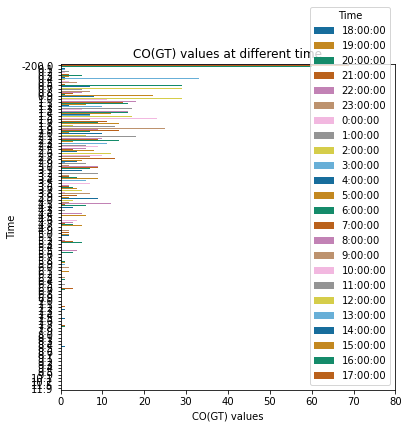

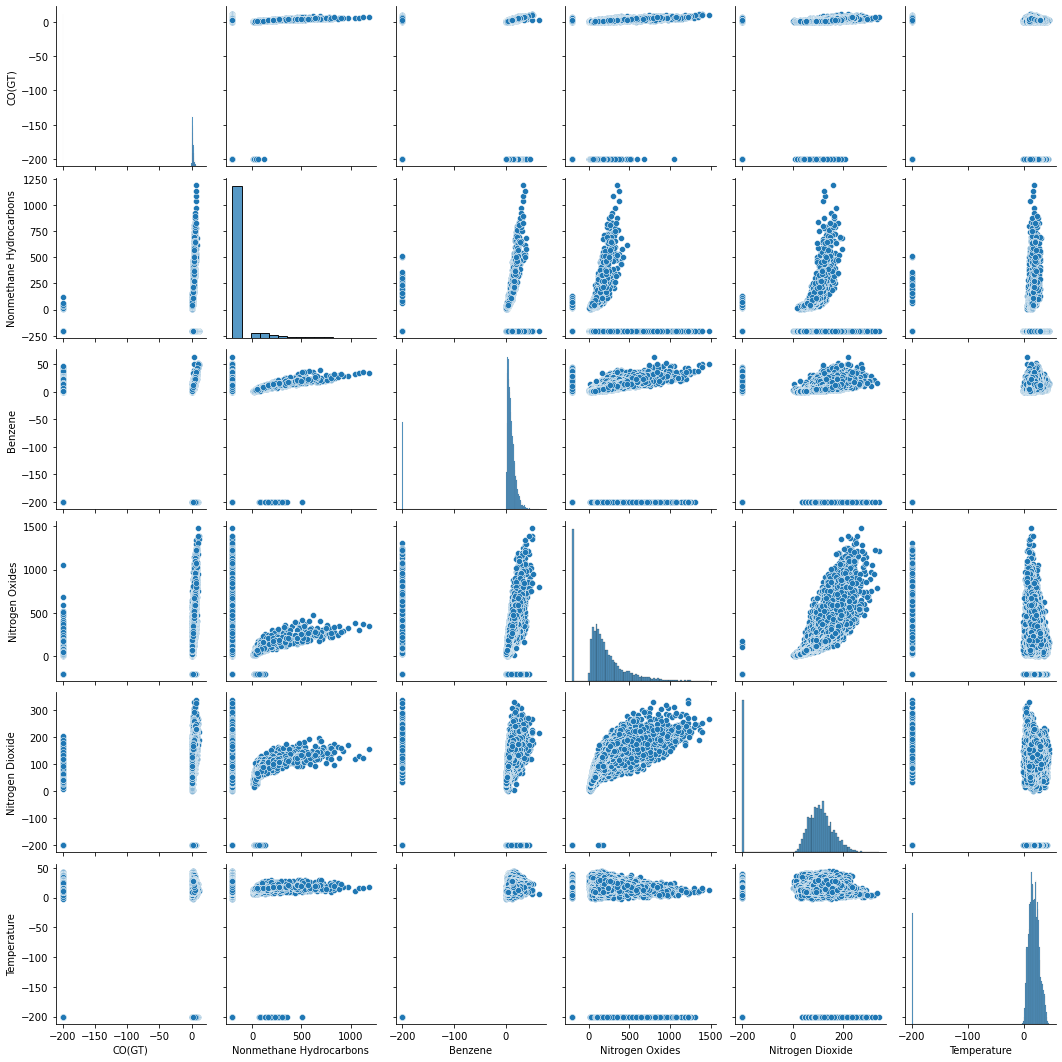

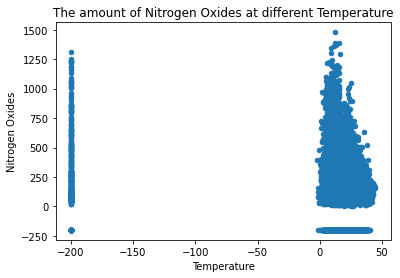

In [14]:
##Task 4 : Conduct an Exploratory Data Analysis (EDA) on your dataset

#Involve at least two columns/features of your dataset:
df_cleaned1= df[df['Nitrogen Oxides']>1000]
df_cleaned2= df[df['CO(GT)']==-200]


#At least three useful visualizations created by you:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

v1 = sns.countplot(y = "CO(GT)", hue = "Time", data=df, palette="colorblind")
v1.set(xlim=(0, 80))
plt.title("CO(GT) values at different time")
plt.xlabel("CO(GT) values")
plt.ylabel("Time")

v2 = sns.pairplot(df)
v2

v3 = df.plot(kind='scatter', x='Temperature', y='Nitrogen Oxides')
plt.title("The amount of Nitrogen Oxides at different Temperature")
v3

Some notes and commentary to help others see observations you find interesting:

I realized in our data, the value -200 appears many time in different columns.
